<a href="https://colab.research.google.com/github/niksisharma/Supervised/blob/main/supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as pt
import seaborn as sns

Importing Database

In [ ]:
url = "http://bit.ly/w-data"
df =  pd.read_csv(url)
df

Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

Viewing details of the database

In [ ]:
df.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

Checking for null values

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Data visualization

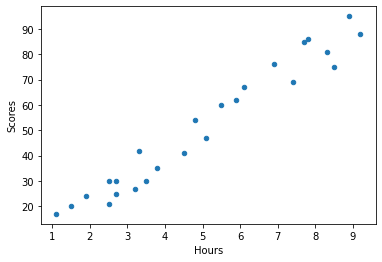

In [ ]:

df.plot(kind='scatter', x='Hours' , y = 'Scores')
pt.show()

In [ ]:
df.corr()

Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000

Splitting data into training and testing data 

In [ ]:
X_train , X_test , y_train , y_test = train_test_split( df.Hours, df.Scores , test_size = 0.2 , random_state = 0)

Training the model

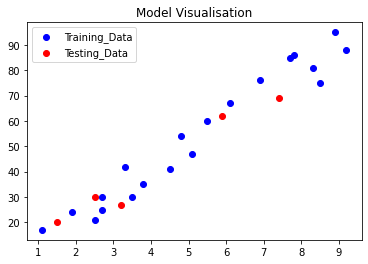

In [ ]:
pt.scatter(X_train , y_train , label = 'Training_Data' , color='b')
pt.scatter(X_test , y_test , label = 'Testing_Data' , color='r')
pt.legend()
pt.title("Model Visualisation")
pt.show()

Using linear regression for training

In [ ]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prediction of the trained model

In [ ]:
pred = LR.predict(X_test.values.reshape(-1,1))
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing actual values with predicted values

In [ ]:
dfg = pd.DataFrame({'Actual values': y_test, 'Predicted values': pred})  
dfg

Actual values  Predicted values
5              20         16.884145
2              27         33.732261
19             69         75.357018
16             30         26.794801
11             62         60.491033

Graph showing actual and predicted values

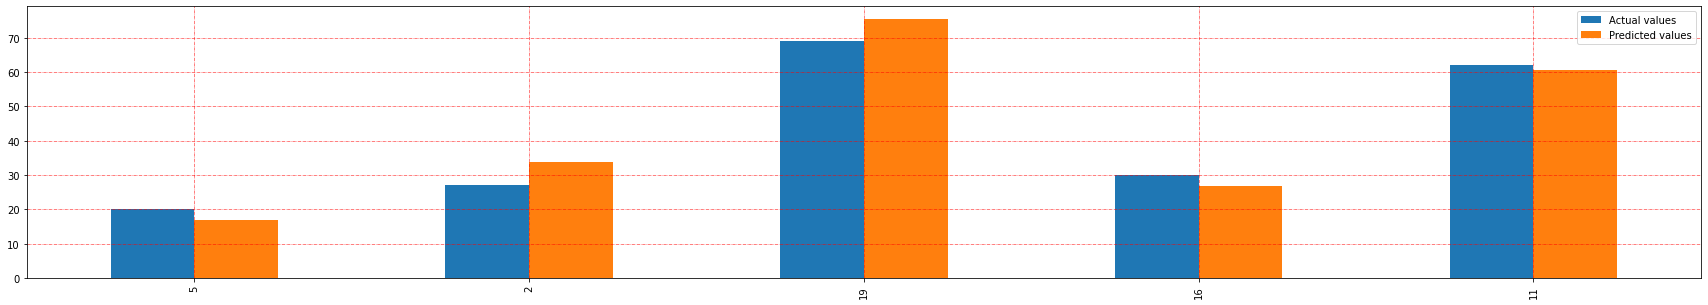

In [ ]:
graph = dfg.head()
graph.plot(kind='bar',figsize=(30,5))
pt.grid(which = 'both', color='red', linestyle='-.', linewidth=0.5)
pt.show()

Graph showing test data

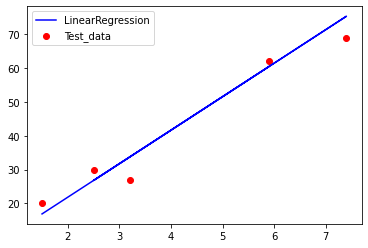

In [ ]:
pt.plot(X_test , pred , label = 'LinearRegression' , color = 'b')
pt.scatter (X_test , y_test , label = 'Test_data' , color = 'r'  )
pt.legend()
pt.show()

Predicting score for when student studies for 9.25hrs/day

In [ ]:
hour = 9.25
predict_score = LR.predict([[hour]])
print('Predicted Score for 9.25 hours is:', predict_score)

Predicted Score for 9.25 hours is: [93.69173249]


Evaluating the fitness of the algorithm

In [ ]:
Mean_Sq_Error = mean_squared_error(y_test, pred)
print("The Mean Squared Error is",Mean_Sq_Error)

Mean_Abs_Error = mean_absolute_error(y_test, pred)
print("The Mean Absolute Eror is", Mean_Abs_Error)

The Mean Squared Error is 21.598769307217456
The Mean Absolute Eror is 4.183859899002982


Testing accuracy

In [ ]:
r2 = r2_score(y_test,pred)
accuracy = r2*100
print("The accuracy for the prediction of the model is: ",accuracy)

The accuracy for the prediction of the model is:  94.54906892105353
